**Load the MNIST train and test data**

In [1]:
from src.data import DataHelper
X_train, y_train, X_test, y_test = DataHelper.load_and_split_data()
print(f"X_train: {X_train.shape}; y_train: {y_train.shape}; X_test: {X_test.shape}; y_test: {y_test.shape}")

X_train: (60000, 28, 28); y_train: (60000,); X_test: (10000, 28, 28); y_test: (10000,)


**Visualise the train data**

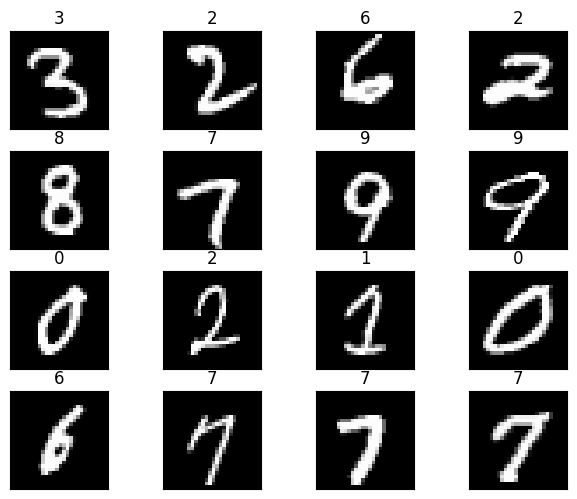

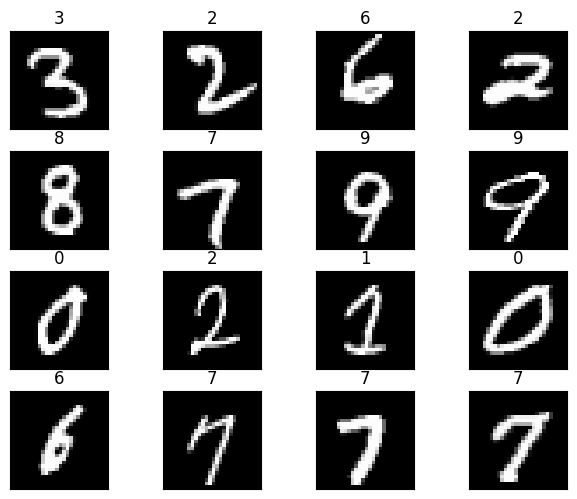

In [2]:
DataHelper.visualise(X_train, y_train)

**Pre-process the images data before neural network training**

In [3]:
X_train = DataHelper.preprocess_images(X_train)
X_test = DataHelper.preprocess_images(X_test)

**One-hot encode labels**

In [4]:
from src.encoders import OneHotEncoder
num_classes = 10
y_train_onehot = OneHotEncoder.encode(y_train, num_labels=num_classes)

**Initiate the neural network**

In [5]:
from src.neural import Neural
nn = Neural(input_size = X_train.shape[1], hidden1_size = 128, hidden2_size = 64, output_size = 10)

**Train the neural network**

In [6]:
max_epochs=10
#progress_func=lambda epoch, train_accuracy: print(f"Epoch {epoch + 1: >2}/{max_epochs}, Accuracy training set: {train_accuracy:.4f}")
progress_func=lambda epoch, train_accuracy: print(f"Epoch {epoch}")

nn.train(X_train=X_train, y_train=y_train_onehot, learning_rate=0.1, epochs=max_epochs, batch_size=64, progress_func=progress_func)

**Check the accuracy score and predictions for the test set**

In [7]:
print(f"Training accuracy: {nn.score(X_train, y_train)}")
print(f"Test accuracy: {nn.score(X_test, y_test)}")
predictions = nn.predict(X_test)
predictions

Training accuracy: 0.9598
Test accuracy: 0.9478


array([7, 2, 1, ..., 4, 5, 6])